In [1]:
# Import necessary libraries, including Pandas for data manipulation, scikit-learn for machine learning, 
#Seaborn and Matplotlib for visualization, and logging/joblib for logging and model persistence.

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from joblib import dump, load


In [3]:
# Set up logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [4]:
# To handle the processing of new data using the trained model.
def process_new_data(new_data_path, model):
    """
    Process new data using the trained model.

    Parameters:
    - new_data_path (str): Path to the new dataset in CSV format.
    - model: Trained machine learning model.

    Returns:
    - predictions: Predictions for the new dataset.
    """
    try:
        # Load new data
        new_df = pd.read_csv(new_data_path)

        # Feature Engineering
        new_df['Car_Age'] = 2024 - new_df['Year']
        new_df_encoded = pd.get_dummies(new_df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

        # Split the dataset into features (X) and target variable (y)
        X_new = new_df_encoded.drop(['Car_Name', 'Year', 'Selling_Price'], axis=1)

        # Make predictions
        predictions = model.predict(X_new)

        logger.info("Successfully processed new data.")
        return predictions

    except Exception as e:
        logger.error(f"Error processing new data: {e}")
        raise

In [5]:
# Loading dataset

file_path = 'car data.csv'
df = pd.read_csv(file_path)

# Feature Engineering

df['Car_Age'] = 2024 - df['Year']
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)


In [6]:
# Split the dataset into features (X) and target variable (y)

X = df_encoded.drop(['Car_Name', 'Year', 'Selling_Price'], axis=1)
y = df_encoded['Selling_Price']


In [7]:
# Data Splitting

try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
except Exception as e:
    logger.error(f"Error splitting the data: {e}")
    raise


In [8]:
# Hyperparameter Tuning with Random Forest Regressor

param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
}

# Random Forest Regressor
model_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [9]:
# Hyperparameter tuning using GridSearchCV for the Random Forest Regressor.

try:
    grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search_rf.fit(X_train, y_train)
except Exception as e:
    logger.error(f"Error performing Random Forest hyperparameter tuning: {e}")
    raise


In [12]:
# Best Model with Best Hyperparameters (Random Forest)

best_model_rf = grid_search_rf.best_estimator_


# Save the trained model using joblib (you can choose another format if you prefer)

model_filename = 'best_model_rf.joblib'
try:
    dump(best_model_rf, model_filename)
    logger.info(f"Trained model saved as {model_filename}")
except Exception as e:
    logger.error(f"Error saving the trained model: {e}")
    raise

INFO:__main__:Trained model saved as best_model_rf.joblib


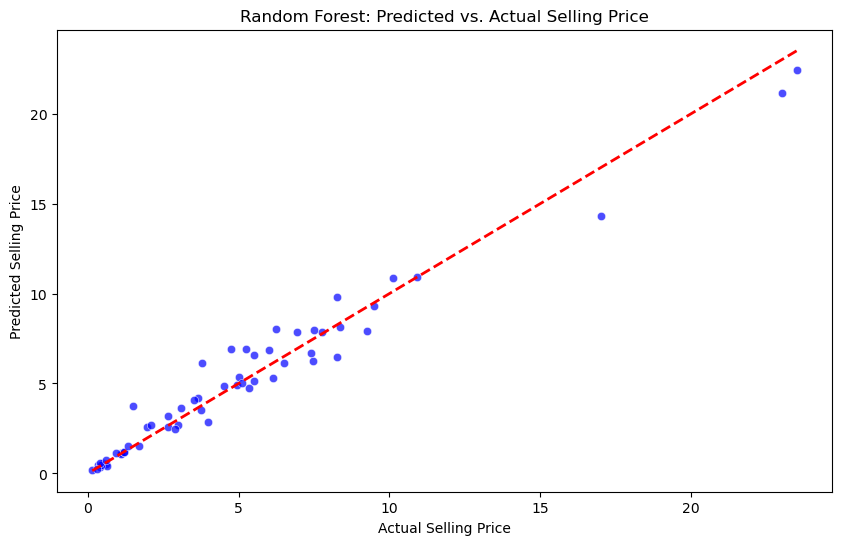

In [13]:
# Model Evaluation with Best Model (Random Forest)

y_pred_best_rf = best_model_rf.predict(X_test)


# Visualize Predicted vs. Actual with Best Model (Random Forest)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best_rf, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Random Forest: Predicted vs. Actual Selling Price')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()


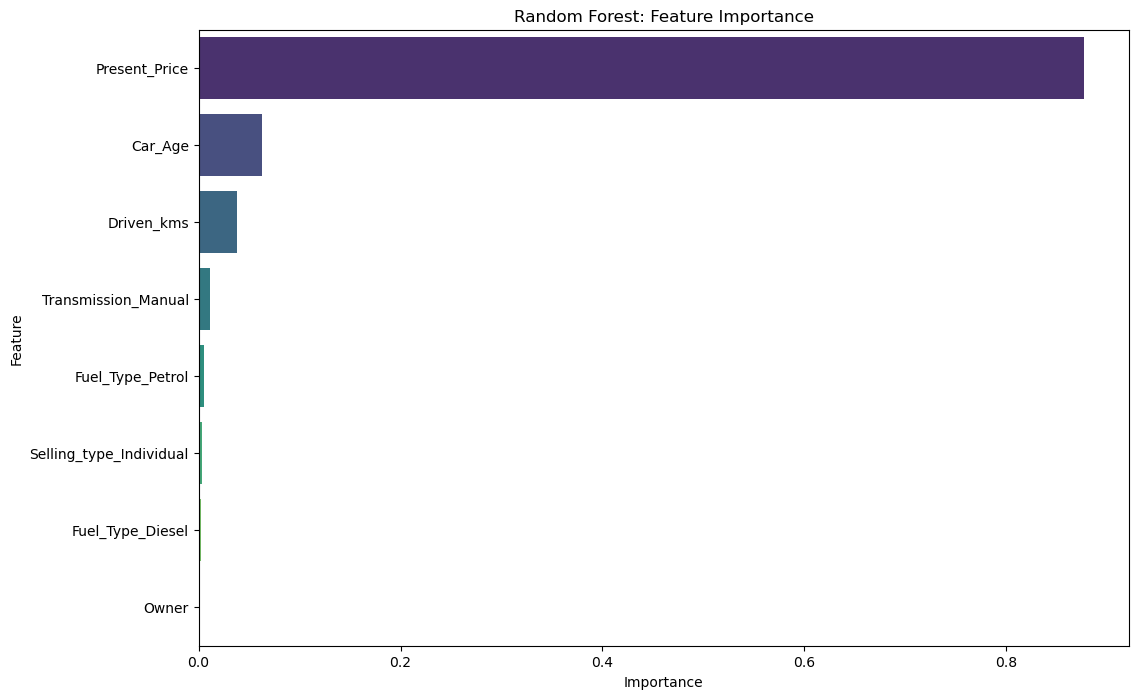

In [14]:
# Feature Importance Visualization

feature_importance_rf = best_model_rf.named_steps['regressor'].feature_importances_
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)


# Visualize Feature Importance (Random Forest)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf, palette='viridis')
plt.title('Random Forest: Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [15]:
# Load the saved model (for demonstration purposes)

loaded_model = load('best_model_rf.joblib')

# Example: Process new data
# new_data_path = 'path_to_new_data.csv'  # Replace with the path to your new dataset
# try:
#     new_data_predictions = process_new_data(new_data_path, loaded_model)
#     logger.info(f"Predictions for new data: {new_data_predictions}")
# except Exception as e:
#     logger.error(f"Error processing new data: {e}")


In [18]:
# Hyperparameter Tuning with Gradient Boosting Regressor

param_grid_gb = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
}


# Gradient Boosting Regressor

model_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(random_state=42))
])


In [20]:
# Perform hyperparameter tuning using GridSearchCV for the Gradient Boosting Regressor

try:
    grid_search_gb = GridSearchCV(model_gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search_gb.fit(X_train, y_train)
except Exception as e:
    logger.error(f"Error performing Gradient Boosting hyperparameter tuning: {e}")
    raise


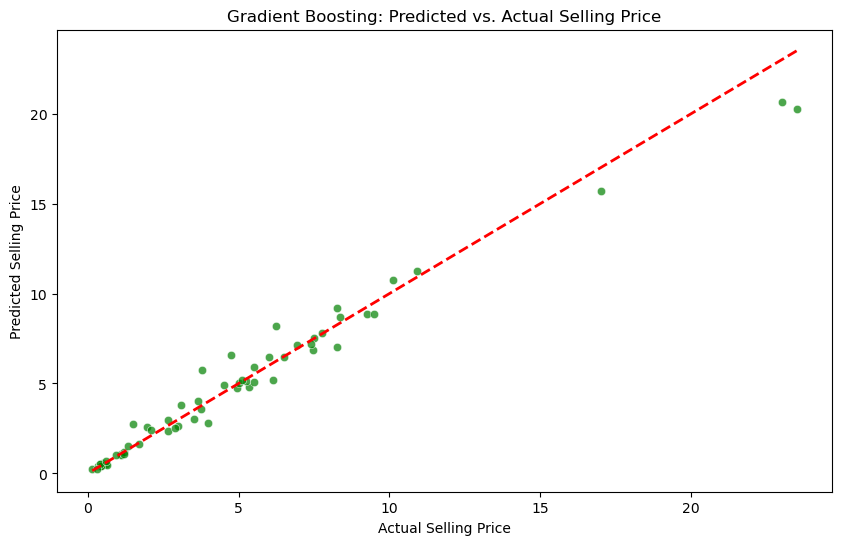

In [21]:
# Best Model with Best Hyperparameters (Gradient Boosting)

best_model_gb = grid_search_gb.best_estimator_


# Model Evaluation with Best Model (Gradient Boosting)

y_pred_best_gb = best_model_gb.predict(X_test)


# Visualize Predicted vs. Actual with Best Model (Gradient Boosting)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best_gb, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Gradient Boosting: Predicted vs. Actual Selling Price')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()


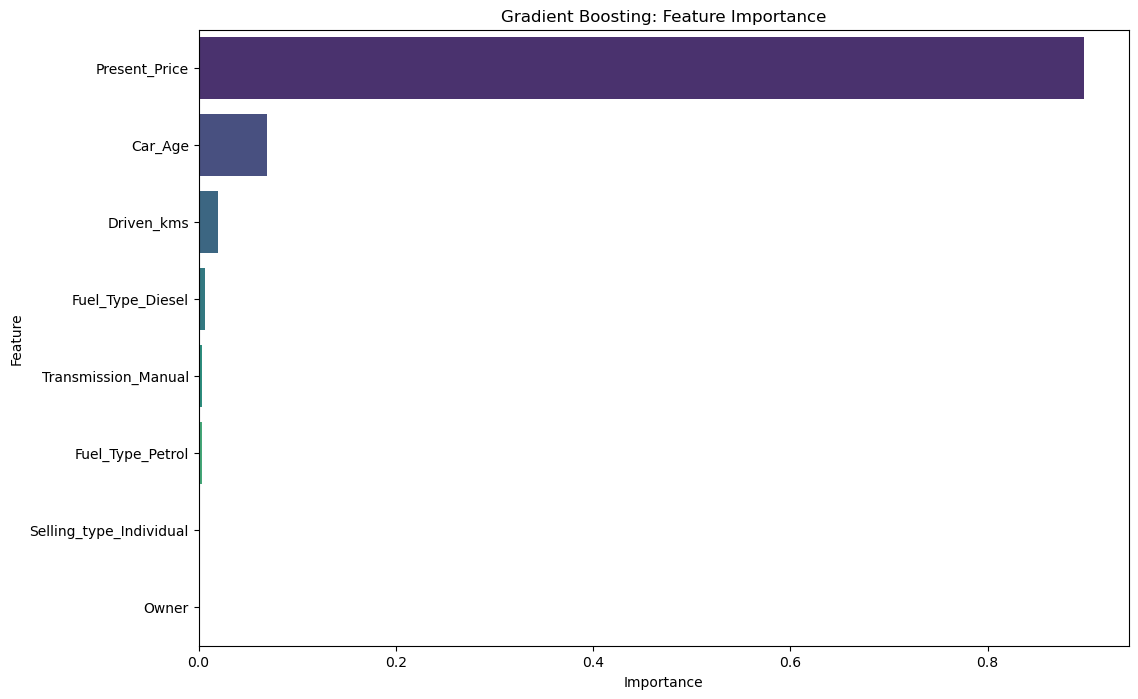

In [22]:
# Feature Importance Visualization (Gradient Boosting)

feature_importance_gb = best_model_gb.named_steps['regressor'].feature_importances_
feature_importance_df_gb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_gb})
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)


# Visualize Feature Importance (Gradient Boosting)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_gb, palette='viridis')
plt.title('Gradient Boosting: Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [23]:
# Evaluate the best model (Gradient Boosting)

mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

# Print Results

print(f'Mean Squared Error (Best Model - Gradient Boosting): {mse_best_gb}')
print(f'R-squared (Best Model - Gradient Boosting): {r2_best_gb}')


Mean Squared Error (Best Model - Gradient Boosting): 0.655569784318758
R-squared (Best Model - Gradient Boosting): 0.9715409963336803
